In [3]:
# _*_ coding: utf-8 _*_
# @Time: 2021/11/26 11:27 
# @Author: yuyongsheng
# @Software: PyCharm
# @Description: 上海六院甲氨蝶呤：5. 数据统计

In [3]:
# 导入程序包
import pymysql as MySQLDB
import pandas as pd
import numpy as np

import re
import sys
import os
project_path = os.getcwd()

# 高低剂量组

In [201]:
# 读入甲氨蝶呤高低剂量组
df_MTX_group=pd.read_excel(project_path+'/data/processed_data/df_10_划分高低剂量组.xlsx')
if 'Unnamed: 0' in df_MTX_group.columns:
    df_MTX_group = df_MTX_group.drop(['Unnamed: 0'], axis=1)

## PSM倾向性分析

### 提取PSM数据

In [448]:
# 提取控制变量
control_v = ['case_no','gender','age','血红蛋白_3d','白细胞_3d','血小板_3d','吸烟史','饮酒史','高血压','糖尿病','肝炎','group']
df_MTX_PSM = df_MTX_group[control_v]

In [449]:
# 重命名
df_MTX_PSM.rename(columns={ '血红蛋白_3d':'HGB_3d',
                               '白细胞_3d':'WBC_3d',
                               '血小板_3d':'PLT_3d',
                               '吸烟史':'smoking',
                               '饮酒史':'drinking',
                               '高血压':'EH',
                               '糖尿病':'DM',
                               '肝炎':'HCV'},inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [450]:
# 替换性别，男1,0女
df_MTX_PSM['gender'] = df_MTX_PSM['gender'].astype('str')
df_MTX_PSM['gender'] = df_MTX_PSM['gender'].str.replace(' ','').apply(lambda x: 1 if x == '男' else 0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [451]:
# 删除缺失数据
df_MTX_PSM = df_MTX_PSM.dropna()

In [452]:
df_MTX_PSM.shape
df_MTX_PSM.group.value_counts()

0    360
1    341
Name: group, dtype: int64

In [453]:
df_MTX_PSM

,case_no,gender,age,HGB_3d,WBC_3d,PLT_3d,smoking,drinking,EH,DM,HCV,group
0,458317,1,47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,498880,0,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,562959,1,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,569556,0,55,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,588681,0,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
713,1214110,1,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
714,1214934,1,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
715,1219193,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
716,1223760,1,26,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1


In [454]:
# 保存psm数据
writer=pd.ExcelWriter(project_path+'/data/result/df_1.1.1_PSM控制变量.xlsx')
df_MTX_PSM.to_excel(writer)
writer.save()

### 匹配的PSM分组数据

In [455]:
# 读入PSM匹配的数据
df_PSM_match=pd.read_excel(project_path+'/data/result/PSM匹配结果.xlsx')
# del df_PSM_match['Unnamed: 0']

In [456]:
# 筛选PSM匹配的数据
df_MTX_PSM_match = df_MTX_PSM[df_MTX_PSM['case_no'].isin(np.unique(df_PSM_match['case_no']))]

In [457]:
df_MTX_PSM_match.shape

(434, 12)

In [458]:
# 筛选PSM匹配的分组数据
writer=pd.ExcelWriter(project_path+'/data/result/df_1.1.2_匹配的PSM控制变量.xlsx')
df_MTX_PSM_match.to_excel(writer)
writer.save()

### PSM控制变量统计

In [459]:
# 分类变量名
discrete_col=['gender', 'HGB_3d', 'WBC_3d', 'PLT_3d','smoking', 'drinking', 'EH', 'DM', 'HCV']
# 连续变量名
# continuous_col=[x for x in df_MTX_PSM_match.columns if x not in discrete_col]
# continuous_col.remove('case_no')
continuous_col=['age']

In [460]:
# 提取甲氨蝶呤高低剂量组
df_MTX_high = df_MTX_PSM_match[df_MTX_PSM_match['group']==1]
df_MTX_low = df_MTX_PSM_match[df_MTX_PSM_match['group']==0]

#### PSM分类变量统计

In [484]:
# 求分类变量比例
feature_list=[]  
percent_high_0_list=[]
percent_high_1_list=[]
percent_low_0_list=[]
percent_low_1_list=[]
for i in discrete_col:
    feature_list.append(i)
    # 高剂量组的比例
    percent_high_0=df_MTX_high[df_MTX_high[i]==0].shape[0]/df_MTX_high.shape[0]
    percent_high_1=df_MTX_high[df_MTX_high[i]==1].shape[0]/df_MTX_high.shape[0]
    percent_high_0_list.append(percent_high_0)
    percent_high_1_list.append(percent_high_1)
    # 低剂量组的比例
    percent_low_0=df_MTX_low[df_MTX_low[i]==0].shape[0]/df_MTX_low.shape[0]
    percent_low_1=df_MTX_low[df_MTX_low[i]==1].shape[0]/df_MTX_low.shape[0]
    percent_low_0_list.append(percent_low_0)
    percent_low_1_list.append(percent_low_1)  

In [485]:
df_result=pd.DataFrame({'特征':feature_list,
                        'high_0':percent_high_0_list,
                        'low_0':percent_low_0_list,
                        'high_1':percent_high_1_list,
                        'low_1':percent_low_1_list})

In [486]:
# 保存分类变量统计
writer=pd.ExcelWriter(project_path+'/data/result/df_1.1.3_分类变量统计.xlsx')
df_result.to_excel(writer)
writer.save()

#### PSM连续变量统计

In [488]:
# 求连续变量均值、方差、标准差
feature_list=[]  
mean_list_high=[]
mean_list_low=[]
std_list_high=[]
std_list_low=[]
for i in continuous_col:
    feature_list.append(i)
    # 均值
    mean_value_high= df_MTX_high[i].mean()
    mean_value_low= df_MTX_low[i].mean()
    mean_list_high.append(mean_value_high)
    mean_list_low.append(mean_value_low)
    # 标准差
    std_value_high= df_MTX_high[i].std()
    std_value_low= df_MTX_low[i].std()
    std_list_high.append(std_value_high)
    std_list_low.append(std_value_low)

In [489]:
df_result=pd.DataFrame({'特征':feature_list,
                        'mean_high':mean_list_high,
                        'mean_low':mean_list_low,
                        'std_high':std_list_high,
                        'std_low':std_list_low})

In [490]:
# 保存连续变量统计
writer=pd.ExcelWriter(project_path+'/data/result/df_1.1.3_连续变量统计.xlsx')
df_result.to_excel(writer)
writer.save()

### PSM变量的显著性检验

#### PSM的分类变量显著性检验

In [467]:
# 二分类卡方检验
from scipy.stats import chi2_contingency
feature_list=[]
y_list=[]
t_list=[]
p_list=[]
sig_list=[]
for i in discrete_col:
    result = chi2_contingency(pd.crosstab(df_MTX_PSM_match['group'],df_MTX_PSM_match[i]))
    t,p=result[0:2]
    feature_list.append(i)
    y_list.append('卡方检验')
    t_list.append(t)
    p_list.append(p)
    if p <=0.05:
        sig='显著'
    else:
        sig='不显著'
    sig_list.append(sig)

In [468]:
df_result=pd.DataFrame({'特征':feature_list,
                        '检验指标':y_list,
                        't值':t_list,
                        'p值':p_list,
                        '显著性结果':sig_list})

In [470]:
# psm分类变量显著性检验
writer=pd.ExcelWriter(project_path+'/data/result/df_1.1.4_PSM分类变量显著性检验.xlsx')
df_result.to_excel(writer)
writer.save()

####  PSM的连续变量显著性检验

In [471]:
from scipy.stats import kstest,shapiro
##检验是否正态
def norm_test(data):
    if len(data) > 30:
        norm, p = kstest(data, 'norm')
    else:
        norm, p = shapiro(data)
    #print(t,p)
    if p>=0.05:
        return True
    else:
        return False

In [472]:
import scipy.stats as st
# 连续变量的显著性检验
def test2(data_b, data_p):
    if norm_test(data_b) and norm_test(data_p):
        x = 1
        y = '独立样本T检验'
        t, p = st.ttest_ind(list(data_b),list(data_p), nan_policy='omit')
    else:
        x = 0
        y = 'Mann-Whitney U检验'
        t,p = st.mannwhitneyu(list(data_b),list(data_p))
    return x,y,t,p

In [473]:
def sig_test(df_high,df_low,list):

    feature_list=[]  # 特征列表
    y_list=[]  # 显著性检验方法
    t_list=[]  # 统计量
    p_list=[]  # p值
    result_list=[]  # 是否显著
    high_mean_list=[]
    low_mean_list=[]

    for i in list:
        # 高剂量组统计
        df_high_nt=df_high[df_high[i].notnull()]
        data_high=df_high_nt[i]
        high_mean=round(data_high.mean(),2)
        
        df_low_nt=df_low[df_low[i].notnull()]
        data_low=df_low_nt[i]
        low_mean=round(data_low.mean(),2)

        # 计算高低剂量组显著性差异
        if data_high.shape[0] >= 10 and data_low.shape[0]>=10:
            # 连续变量检验
            x,y,t,p = test2(data_high, data_low)
            if p <=0.05:
                sig='显著'
            else:
                sig='不显著'
            # 显著性 
            feature_list.append(i)
            y_list.append(y)
            t_list.append(t)
            p_list.append(p)
            result_list.append(sig)
            high_mean_list.append(high_mean)
            low_mean_list.append(low_mean)

    df_result=pd.DataFrame({'特征':feature_list,
                            '高剂量均值':high_mean_list,
                            '低剂量均值':low_mean_list,
                            '检验指标':y_list,
                            't值':t_list,
                            'p值':p_list,
                            '显著性结果':result_list})
    return df_result

In [474]:
# 提取甲氨蝶呤高低剂量组
df_MTX_high = df_MTX_PSM_match[df_MTX_PSM_match['group']==1]
df_MTX_low = df_MTX_PSM_match[df_MTX_PSM_match['group']==0]

In [475]:
# 甲氨蝶呤高低剂量组PSM控制变量统计和显著性检验
df_MTX_PSM_sig = sig_test(df_MTX_high,df_MTX_low,continuous_col)
df_MTX_PSM_sig = df_MTX_PSM_sig.reset_index(drop=True)

In [476]:
# 保存高低剂量组PSM控制变量统计和显著性检验
writer=pd.ExcelWriter(project_path+r'/data/result/df_1.1.4_PSM连续变量显著性检验.xlsx')
df_MTX_PSM_sig.to_excel(writer)
writer.save()

# 变量统计

In [28]:
df_model=pd.read_excel(project_path+'/data/result/feature_engineering/df_1_特征清洗.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [29]:
# 选取变量
discrete_col = ['bmd_label','异甘草酸镁','甘草酸苷','托烷司琼','谷胱甘肽','gender','多烯磷脂酰','长春新碱','吸烟史']
continuous_col=[x for x in df_model.columns if x not in discrete_col]
# continuous_col.remove('bmd_label')

## 分类变量统计

In [30]:
# 求分类变量比例
feature_list=[]  
num_0_list=[]
num_1_list=[]
percent_0_list=[]
percent_1_list=[]
miss_rate_list=[]

for i in discrete_col:
    feature_list.append(i)
    num_0=df_model[df_model[i]==0].shape[0]
    num_1=df_model[df_model[i]==1].shape[0]
    
    num_0_list.append(num_0)
    num_1_list.append(num_1)
    
    percent_0=num_0/df_model.shape[0]
    percent_0="%.2f%%" % (percent_0 * 100)  
    percent_1=num_1/df_model.shape[0]
    percent_1="%.2f%%" % (percent_1 * 100)  
    percent_0_list.append(percent_0)
    percent_1_list.append(percent_1)
    
    miss_rate=df_model[i].isnull().sum()/df_model.shape[0]
    miss_rate="%.2f%%" % (miss_rate * 100)      # 百分数输出
    miss_rate_list.append(miss_rate)

In [31]:
miss_rate

'0.28%'

In [32]:
df_result=pd.DataFrame({'特征':feature_list,
                        'percent_0_num':num_0_list,
                        'percent_0_percent':percent_0_list,
                        'percent_1_num':num_1_list,
                        'percent_1_percent':percent_1_list,
                        'missing_rate':miss_rate_list})

In [33]:
# 保存分类变量统计
writer=pd.ExcelWriter(project_path+'/data/result/df_2.1_分类变量统计.xlsx')
df_result.to_excel(writer)
writer.save()

## 连续变量统计

In [41]:
# 统计全变量体系各变量的平均数、上下四分位数、缺失率
feature_list=[]
mean_list=[]
up_quarter_list=[]
down_quarter_list=[]
miss_list=[]

for i in continuous_col:
    data = df_model[i]
    stat_result = pd.DataFrame(data.describe())
    # print(stat_result)
    mean_value=stat_result.loc['mean',i]
    up_quarter=stat_result.loc['25%',i]
    down_quarter=stat_result.loc['75%',i]

    miss_rate=df_model[i].isnull().sum()/df_model.shape[0]
    miss_rate="%.2f%%" % (miss_rate * 100)      # 百分数输出

    feature_list.append(i)
    mean_list.append(round(mean_value,2))
    up_quarter_list.append(round(up_quarter,2))
    down_quarter_list.append(round(down_quarter,2))
    miss_list.append(miss_rate)

In [42]:
stat_result

,谷草转氨酶(干式)
count,713.000000
mean,72.552595
std,91.804753
min,12.000000
25%,33.000000
50%,49.000000
75%,79.000000
max,1177.000000


In [43]:
df_result=pd.DataFrame({'特征':feature_list,
                        'mean_list':mean_list,
                        'up_quarter':up_quarter_list,
                        'down_quarter':down_quarter_list,
                        'miss_list':miss_list})

In [44]:
# 保存连续变量统计
writer=pd.ExcelWriter(project_path+'/data/result/df_2.2_连续变量统计.xlsx')
df_result.to_excel(writer)
writer.save()

# 重要性性评分

In [20]:
# 提取相关性特征
feature_relate=discrete_col + continuous_col
# 加入目标变量

In [21]:
df_model_relate=df_model[feature_relate]

In [22]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集，比例为8:2
x = df_model_relate.drop(['bmd_label'],axis=1)
y = df_model_relate['bmd_label']
tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=5)

In [23]:
tran_y

338    1
611    0
193    0
575    0
354    0
      ..
73     0
400    0
118    0
701    0
206    0
Name: bmd_label, Length: 574, dtype: int64

In [24]:
# 重要性
import catboost,xgboost
model_boost=xgboost.XGBClassifier(max_depth=5,
                                learning_rate=0.01,
                                n_estimators=500,
                                min_child_weight=0.5,
                                eta=0.1,
                                gamma=0.5,
                                reg_lambda=10,
                                subsample=0.5,
                                colsample_bytree=0.8,
                                nthread=4,
                                scale_pos_weight=1)
model_boost.fit(tran_x,tran_y)
importance = model_boost.feature_importances_
print(tran_x.columns)
print(importance)

Index(['异甘草酸镁', '甘草酸苷', '托烷司琼', '谷胱甘肽', 'gender', '多烯磷脂酰', '长春新碱', '吸烟史',
       '谷草转氨酶(干式)', '谷丙转氨酶(干式)', 'MTX_tdm_72h', '红细胞', '红细胞分布宽度', '碱性磷酸酶(干式)',
       'age', '总胆红素(干式)', 'RBC平均容量', 'RBC平均血红量', 'MTX_tdm_24h', '血清钾(干式)',
       '肌酐(干式)', 'MTX_tdm_48h', 'γ-谷氨酰酶(干式)', '嗜碱性细胞绝对值', 'RBC血红浓度', '日剂量',
       '血清钠(干式)'],
      dtype='object')
[0.0767032  0.06995062 0.06182408 0.04736613 0.04094444 0.03315895
 0.02746355 0.02084958 0.07500058 0.04017841 0.04601552 0.04067519
 0.03663222 0.03684247 0.03182519 0.03480444 0.03254705 0.02948199
 0.02669629 0.02276701 0.02641133 0.02498537 0.02378013 0.02436665
 0.02359941 0.02251971 0.02261046]


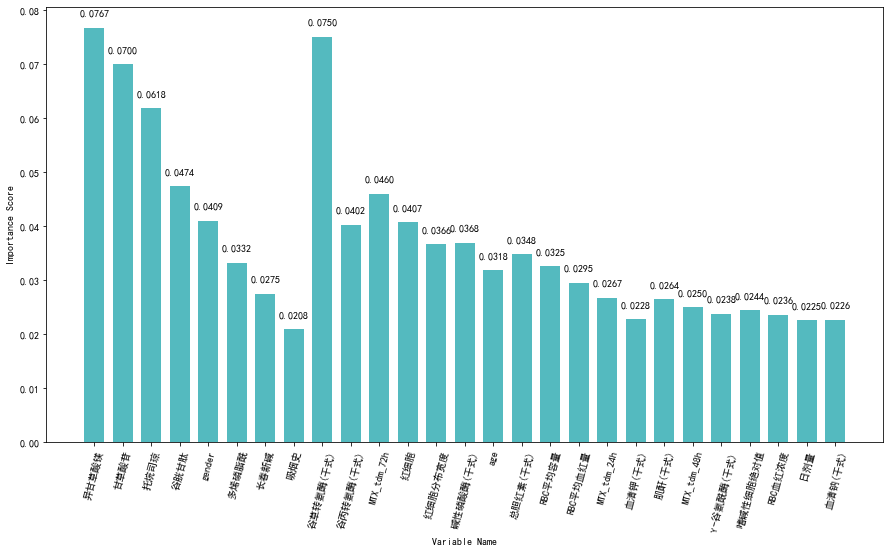

In [31]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
names = tran_x.columns
index = np.arange(len(names))
plt.figure(figsize=(15, 8))
plt.bar(index, importance, width=0.7,
        color=(0.32941176470588235, 0.7294117647058823, 0.7490196078431373), tick_label=names)
plt.xticks(rotation=75)
plt.ylabel('Importance Score')
plt.xlabel('Variable Name')
for a, b in zip(index, importance):
    plt.text(a, b + 0.002, '%.4f' % b, ha='center', va='bottom', fontsize=10)
# plt.title('重要变量得分柱形图')
# plt.show()

In [33]:
    plt.savefig(project_path + "/重要性评分柱状图.jpg", dpi=300)
    plt.clf()  # 删除前面所画的图

<Figure size 432x288 with 0 Axes>